### Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment 
* delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)



In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data

df = pd.read_csv('../notebook/data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [8]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [10]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [11]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
# I am interested in having a general idea of the default probability
df.def_pay.sum() / len(df.def_pay)

0.2212

In [14]:
catigorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')


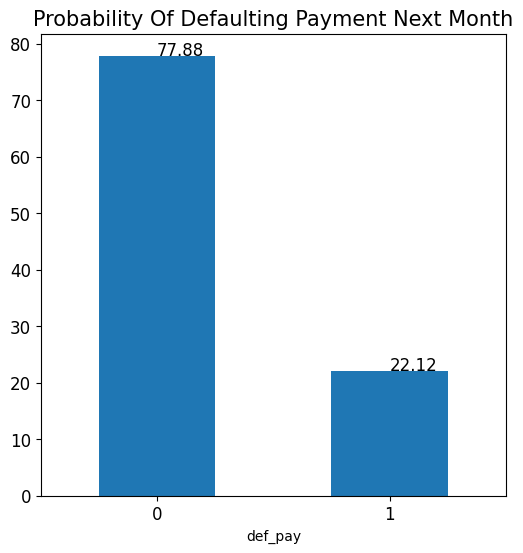

In [15]:
def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,round(y,2),fontsize=12)
plt.show()

In [16]:
df['def_pay'].value_counts()

def_pay
0    23364
1     6636
Name: count, dtype: int64

In [20]:
# We can drop ID column which has no effect on the target variable.
df=df.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


We can see that the dataset consists of 77.88% clients are not expected to default payment whereas 22.12% clients are expected to default the payment.

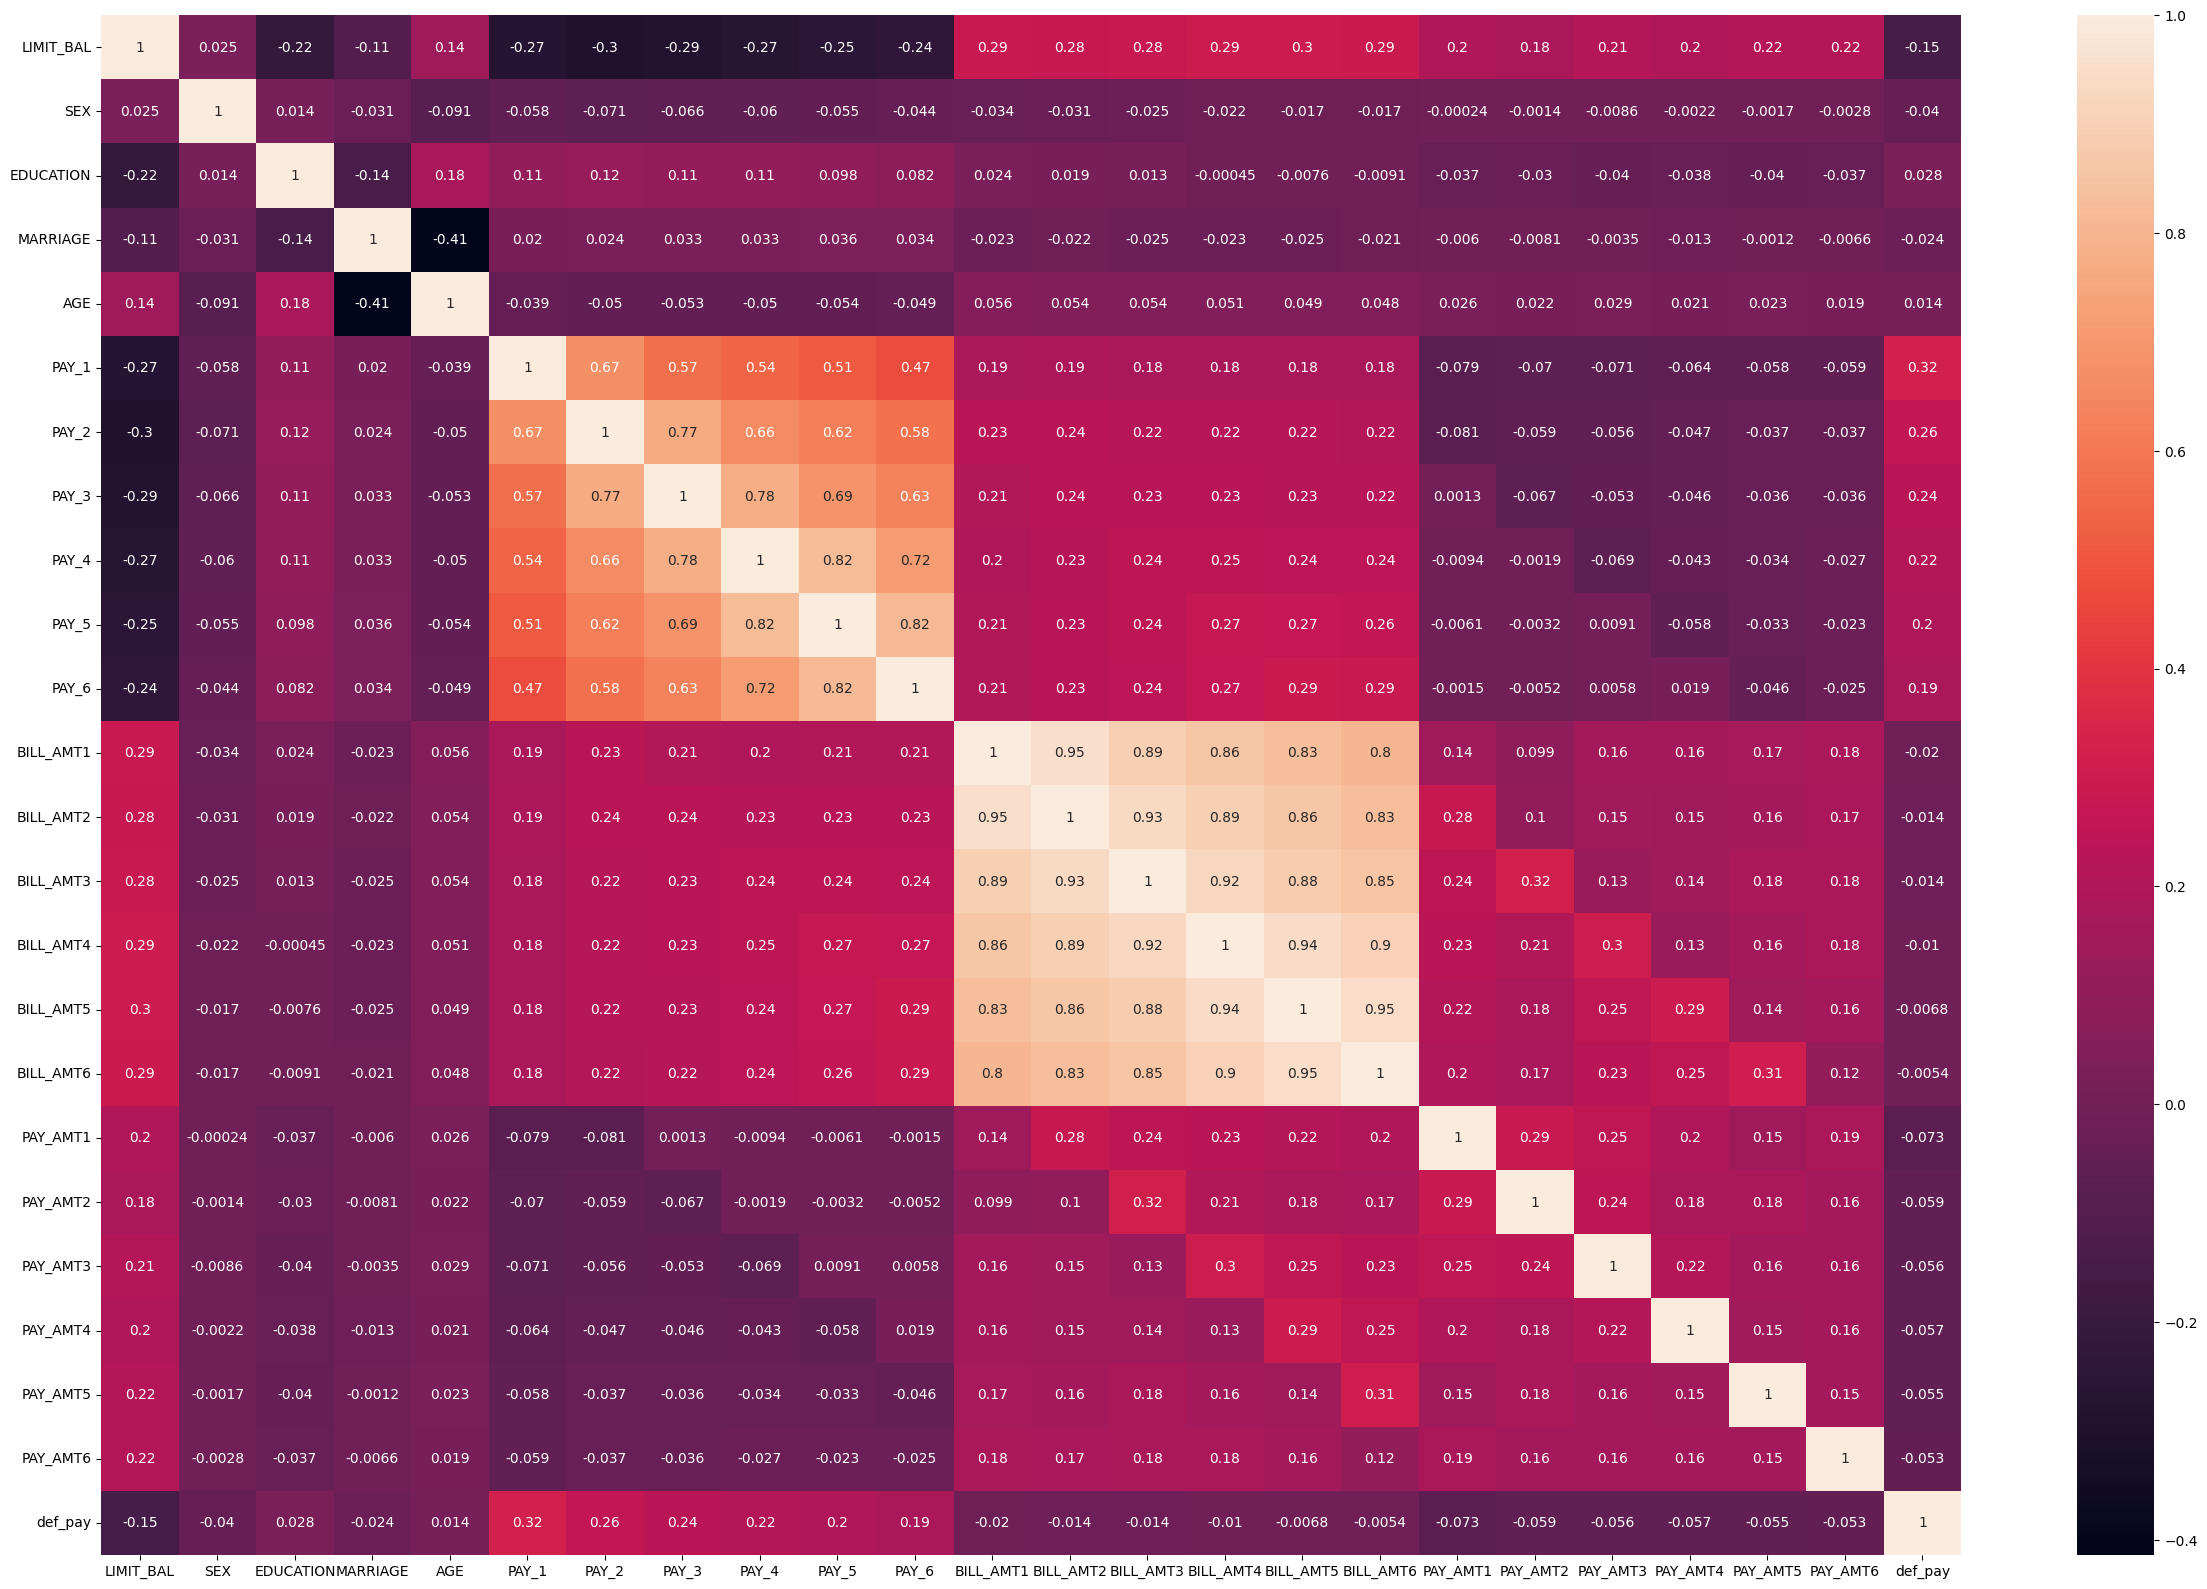

In [21]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

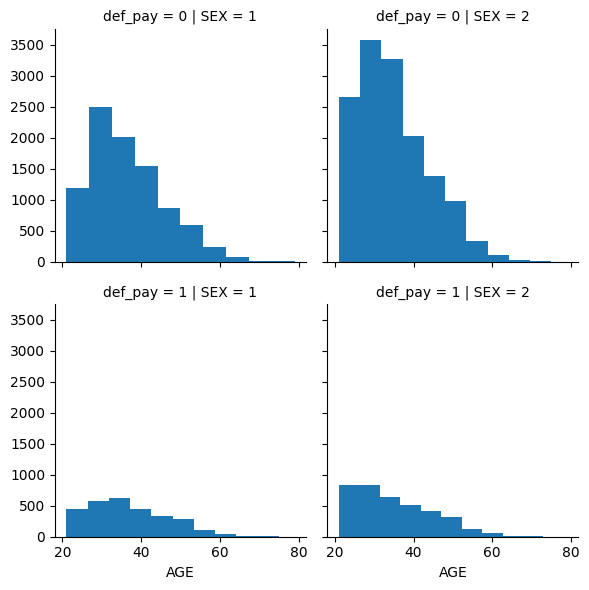

In [22]:
g = sns.FacetGrid(df, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

In [25]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['def_pay']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}})

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,1,1
1,FEMALE,university,2,1
2,FEMALE,university,2,0
3,FEMALE,university,1,0
4,MALE,university,1,0
...,...,...,...,...
29995,MALE,high school,1,0
29996,MALE,high school,2,0
29997,MALE,university,2,1
29998,MALE,high school,1,1


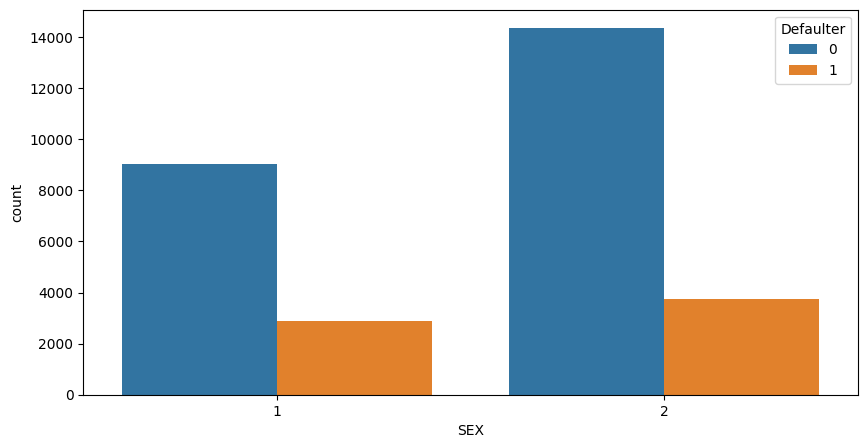

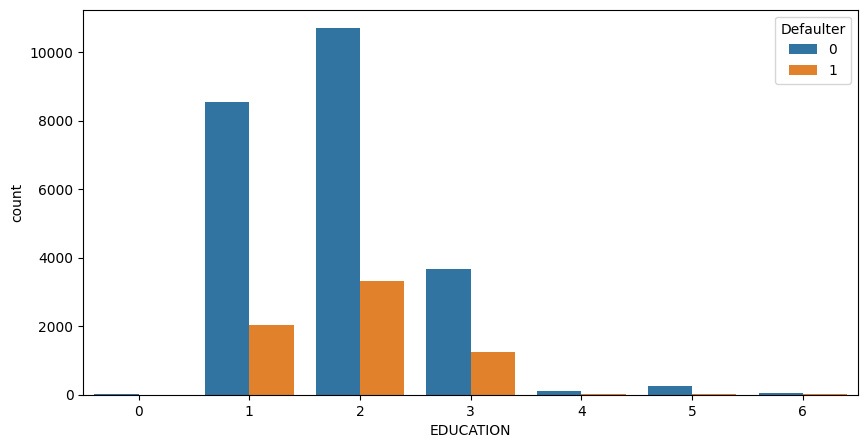

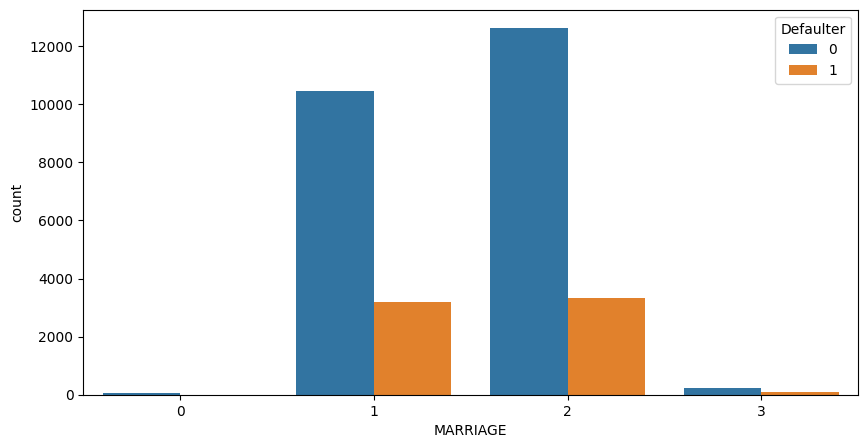

In [26]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    
    sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:

* There are more females credit card holder,so no. of defaulter have high proportion of females.
* No. of defaulters have a higher proportion of educated people (graduate school and university)
* No. of defaulters have a higher proportion of Singles.

## Feature Engineering

### Import libraries and Dataset

In [ ]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log_fem.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE 2 STARTS RUNNING!')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

### Handling the imbalance of data using SMOTE

In [ ]:
# Initialise SMOTE object
smote = SMOTE()

In [ ]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['def_pay']

In [ ]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['def_pay'] = y_smote

df_final.head()

In [ ]:
#plot to check if the dataframe is balanced after smote
sns.countplot('def_pay', data = df_final)

In [ ]:
df_final.default.value_counts()

In [ ]:
logger.info('HANDLING IMBALANCED DATA ENDS!')

Next, we need to perform One Hot Encoding on the categorical variables. But before that, we need to work on the following points:

* Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
* Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
* Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.
* Change values in SEX:
    * 1-Male and
    * 2-Female
* Change values in EDUCATION :
    * 1 : Graguation
    * 2 : University
    * 3 : High School
    * 0,4,5,6 : Others
* Change values in Marriage:
    * 1 : Married
    * 2 : Single
    * 0,3 : Others

In [ ]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

In [ ]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

In [ ]:
df_final.shape

### Encoding categorical variables

In [ ]:
# Encoding categorical variables
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])

df_final.head()

In [ ]:
# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [ ]:
df_final.shape

In [ ]:
logger.info('ENCODING CATEGORICAL VARIABLE ENDS!')

## Model-1 : Basic Model with all features

In [ ]:
logger.info('MODEL-1 RUNNING!')

In [ ]:
# Rearrange columns in dataframe before submitting for modeling
df_final = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'def_pay']]

In [ ]:
#df_model = df_final.sample(frac=0.10, random_state=100)
# Create a copy of df_final
df_model = df_final.copy()
df_model.head()

In [ ]:
# Train Test split
X = df_model.drop(columns=['default'], axis=1)
y = df_model['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

In [ ]:
# Initialise RandomForestClassifier object
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train,y_train)

logger.info('MODEL-1 FITTED ON TRAINING DATA!')

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

Here, we are going to consider Recall Score as our evaluation metric, since we are more considered about predicting maximum number of actual defaulters.

In [ ]:
# Calculate recall scores on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

In [ ]:
# Print the recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

## Feature Selection

In [ ]:
logger.info('FEATURE SELECTION STARTS!')

In [ ]:
# Find feature importance scores
rf_clf.feature_importances_

In [ ]:
# Arrange features according to their scores in descending order
feature_scores = pd.Series(rf_clf.feature_importances_,
                           index=df_model.drop('default', axis=1).columns).sort_values(ascending=False)  

In [ ]:
# Visualizing the scores
f, ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x=feature_scores,
                 y=feature_scores.index)
ax.set_title('Feature Scores')
ax.set_yticklabels(feature_scores.index)
plt.show()

In [ ]:
logger.info('FEATURE SELECTION ENDS!')

# Model-2 : With important features

In [ ]:
logger.info('MODEL-2 RUNNING!')

In [ ]:
# Create a dataframe from df_model using the top 15 features based on importance score
df_imp = df_model[feature_scores.index[:15]]
df_imp['def_pay'] = df_model['def_pay']
df_imp.head()

# Separate independent and dependent variables
X = df_imp.drop('def_pay', axis=1)
y = df_imp['def_pay']

In [ ]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

In [ ]:
# Initiate RandomForestClassifier object
rf_clf_2 = RandomForestClassifier(random_state=6)
rf_clf_2.fit(X_train,y_train)

logger.info('MODEL-2 FITTED ON TRAINING DATA!')

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_2.predict(X_train)
test_class_preds = rf_clf_2.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [ ]:
# Calculate recall scores
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

In [ ]:
# Display recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

OBSERVATION : Recall score on test data has improved from the previous model.

Note : Scores might not improve by huge amounts every time we modify the model, but by few points, which does infact, reduce the loss for the organization by considerable amount monetarily.

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

# Feature Engineering : Create feature BILL_AMT_AVG
In this stage, we create or engineer a new feature BILL_AMT_AVG, by calculating the average of all the bill amounts.

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, STARTS!')

In [ ]:
# Create the new feature in the original dataframe
df_model['BILL_AMT_AVG'] = (df_model['BILL_AMT_APRIL'] + df_model['BILL_AMT_MAY'] + df_model['BILL_AMT_JUNE'] + df_model['BILL_AMT_JULY'] + df_model['BILL_AMT_AUG'] + df_model['BILL_AMT_SEPT'])/6

In [ ]:
# Add the new feature to df_imp
df_imp['BILL_AMT_AVG'] = df_model['BILL_AMT_AVG']
df_imp.head()

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

## Model-3 : With new feature BILL_AMT_AVG

In [ ]:
logger.info('MODEL-3 RUNNING!')

In [ ]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

In [ ]:
rf_clf_3 = RandomForestClassifier(random_state=6)
rf_clf_3.fit(X_train,y_train)

logger.info('MODEL FITTED ON TRAINING DATA!')

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_3.predict(X_train)
test_class_preds = rf_clf_3.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [ ]:
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

In [ ]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

In [ ]:
X[:1]

## Feature Engineering : Create feature BILL_PAY_VALUE

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_PAY_VALUE, STARTS!')

In [ ]:
df_model['BILL_PAY_VALUE'] = ((df_model['PAY_AMT_SEPT']-df_model['BILL_AMT_AUG']) +
                       (df_model['PAY_AMT_AUG']-df_model['BILL_AMT_JULY']) +
                       (df_model['PAY_AMT_JULY']-df_model['BILL_AMT_JUNE']) +
                       (df_model['PAY_AMT_JUNE']-df_model['BILL_AMT_MAY']) +
                       (df_model['PAY_AMT_MAY']-df_model['BILL_AMT_APRIL']))/5

In [ ]:
df_imp['BILL_PAY_VALUE'] = df_model['BILL_PAY_VALUE']
df_imp.head()

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

## Model-4 : With new feature BILL_PAY_VALUE

In [ ]:
logger.info('MODEL-4 RUNNING!')

In [ ]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [ ]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_clf_4 = RandomForestClassifier(random_state=6)
rf_clf_4.fit(X_train,y_train)

logger.info('MODEL-4 FITTED ON TRAINING DATA!')

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_4.predict(X_train)
test_class_preds = rf_clf_4.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [ ]:
# Recall scores calculated on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

In [ ]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

OBSERVATION : Recall score has decresed by a couple of points from the previous model. We decide to remove the feature from the independent variable set.

In [ ]:
df_imp.drop('BILL_PAY_VALUE', axis=1, inplace=True)

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

## Save the Model

In [ ]:
logger.info('SAVING THE MODEL....')

We got the highest recall score using model rf_clf_3 with 0.867. Therefore, we shall save this model for production.

In [ ]:
pickle.dump(rf_clf_3, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

Compress the model.pkl, since it is difficult to upload a file more than 25mb in Github (for deployment).

In [ ]:
!pip install bz2file

In [ ]:
import bz2file as bz2 

In [ ]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [ ]:
compressed_pickle('ccdp', rf_clf_3)

In [ ]:
logger.info('PROJECT RUNNING ENDS!')